In [70]:
! pip install aydin trackpy wsireg scanpy

  Using cached aydin-0.1.15-py3-none-any.whl (637 kB)
  Using cached wsireg-0.3.7-py2.py3-none-any.whl (80 kB)
  Using cached scanpy-1.9.1-py3-none-any.whl (2.0 MB)
  Using cached catboost-1.1-cp39-none-manylinux1_x86_64.whl (76.8 MB)
  Using cached protobuf-3.20.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Using cached imageio-2.21.1-py3-none-any.whl (3.4 MB)
  Using cached czifile-2019.7.2-py2.py3-none-any.whl (18 kB)
  Using cached pynndescent-0.5.7.tar.gz (1.1 MB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached tensorflow-2.8.1-cp39-cp39-manylinux2010_x86_64.whl (498.0 MB)
  Using cached memoization-0.4.0.tar.gz (41 kB)
  Using cached jsonpickle-1.3-py2.py3-none-any.whl (32 kB)
  Using cached lightgbm-3.3.3-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached gdown-4.5.3.tar.gz (14 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached napar

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tiler-0.5.7-py3-none-any.whl (17 kB)
  Using cached SimpleITK-2.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (52.8 MB)
  Using cached itk_elastix-0.14.2-cp39-cp39-manylinux_2_28_x86_64.whl (93.6 MB)
  Using cached geojson-2.5.0-py2.py3-none-any.whl (14 kB)
     |████████████████████████████████| 297 kB 29.6 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 1.9 MB/s  eta 0:00:01
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
     |████████████████████████████████| 30.8 MB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 47 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 15.3 MB 1.3 MB/s eta 0:00:01


     |████████████████████████████████| 232 kB 45.3 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 37.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 36.7 MB/s eta 0:00:01
     |████████████████████████████████| 174 kB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 384 kB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 151 kB 25.2 MB/s eta 0:00:01


     |████████████████████████████████| 58.8 MB 13.2 MB/s eta 0:00:01     |██████████████████████          | 40.4 MB 20.1 MB/s eta 0:00:01
     |████████████████████████████████| 25.6 MB 31.0 MB/s eta 0:00:01
     |████████████████████████████████| 26.6 MB 69 kB/s s eta 0:00:01
     |████████████████████████████████| 81.2 MB 66 kB/s s eta 0:00:01
     |████████████████████████████████| 73.6 MB 34 kB/s  eta 0:00:01     |███████████████▋                | 36.0 MB 513 kB/s eta 0:01:14
     |████████████████████████████████| 16.5 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 775 kB/s  eta 0:00:01
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14821 sha256=bd0499a8c9c34810aab586eadd2a753f93549b7690a5c922408920c4cea2a020
  Stored in directory: /root/.cache/pip/wheels/ed/8a/de/15273923b1f5adacc09306cc48dcedc6b082892569afb2dfc7
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50467 sha256=363c19621b4ca8f577dc0e0ea6

In [2]:
from aydin.restoration.denoise.classic import Classic

2022-10-22 20:29:33.983050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-22 20:29:33.983102: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [29]:
from dask_image.imread import imread
import matplotlib.pyplot as plt
import numpy as np
import napari
import trackpy
import pandas as pd
plt.rcParams["figure.figsize"] = (15, 10)

In [6]:
anchor_img = imread("/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/registration/wsireg_output_old_cycle5/Test/Test-cycle1_registered.ome.tiff")

In [7]:
vmax = 3500

In [8]:
viewer = napari.Viewer()

In [19]:
raw_dapi = anchor_img[1, 4000:10000, 4000:10000].compute()

In [43]:
raw_peaks = trackpy.locate(raw_dapi, 9, separation=2, percentile=90)

In [32]:
viewer.add_image(raw_dapi)

<Image layer 'raw_dapi [1]' at 0x7f8915849880>

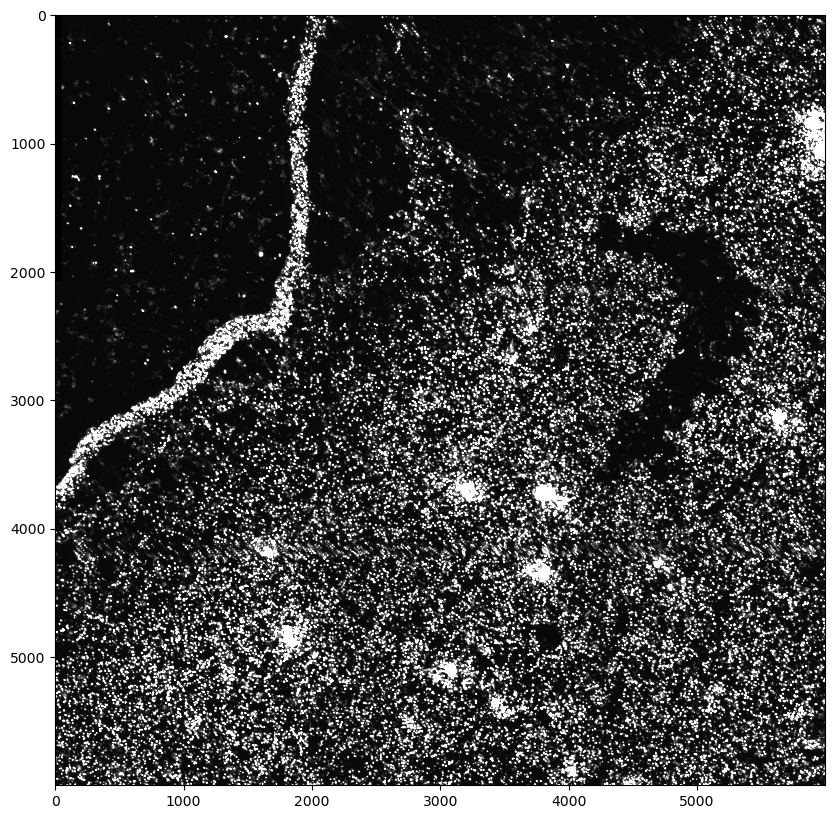

In [33]:
plt.imshow(raw_dapi, vmax=vmax, cmap="gray")

In [15]:
from aydin.restoration.denoise.classic import classic_denoise

In [17]:
# classic_restoration = Classic()
# classic_restoration.train(raw_dapi.compute())
# denoised_image = classic_restoration.denoise(raw_dapi.compute())

In [16]:
denoised_image = classic_denoise(raw_dapi)

Callback for minimizer starting at [0.34375 0.71875]:
Callback for minimizer starting at [0.359375 0.453125]:
Callback for minimizer starting at [0.3671875 0.8671875]:


In [26]:
from aydin.restoration.denoise.noise2selffgr import noise2self_fgr

denoised_image = noise2self_fgr(raw_dapi)

0:	learn: 0.0370144	test: 0.0371560	best: 0.0371560 (0)	total: 112ms	remaining: 7m 38s
50:	learn: 0.0076551	test: 0.0076730	best: 0.0074425 (35)	total: 6.56s	remaining: 8m 40s
bestTest = 0.007442523807
bestIteration = 35
Shrink model to first 36 iterations.
0:	learn: 0.0522865	test: 0.0523789	best: 0.0523789 (0)	total: 112ms	remaining: 7m 38s
bestTest = 0.01509388666
bestIteration = 15
Shrink model to first 16 iterations.
0:	learn: 0.0403198	test: 0.0404440	best: 0.0404440 (0)	total: 112ms	remaining: 7m 38s
50:	learn: 0.0150029	test: 0.0150154	best: 0.0096582 (23)	total: 6.62s	remaining: 8m 45s
bestTest = 0.009658241027
bestIteration = 23
Shrink model to first 24 iterations.
0:	learn: 0.0363792	test: 0.0365246	best: 0.0365246 (0)	total: 113ms	remaining: 7m 41s
50:	learn: 0.0056298	test: 0.0056478	best: 0.0056443 (48)	total: 6.62s	remaining: 8m 45s
bestTest = 0.005644277309
bestIteration = 48
Shrink model to first 49 iterations.
0:	learn: 0.0372191	test: 0.0373765	best: 0.0373765 (0)	to

In [114]:
denoised_peaks = trackpy.locate(denoised_image, 9, separation=2, percentile=90)

In [25]:
from aydin.restoration.deconvolve.lr import lucyrichardson

lr_deconvolved_image = lucyrichardson(raw_dapi)

ModuleNotFoundError: No module named 'aydin.restoration.deconvolve'

In [45]:
raw_point_layer = viewer.add_points(raw_peaks[['y', 'x']], name="raw")
denoised_point_layer = viewer.add_points(denoised_peaks[['y', 'x']], name="denoised")

/opt/conda/lib/python3.9/site-packages/numpy/core/numeric.py:2463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/opt/conda/lib/python3.9/site-packages/numpy/core/numeric.py:2463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [28]:
viewer.add_image(denoised_image, name="n2self_fgr")

<Image layer 'n2self_fgr [1]' at 0x7f891594cac0>

In [17]:
moving_img = imread("/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/registration/wsireg_output/Test/Test-cycle2_to_cycle1_registered.ome.tiff")

In [39]:
fake_anchor_max = np.max(moving_img[1:, 4000:10000, 4000:10000], 0)

In [40]:
fake_anchor_max

dask.array<amax-aggregate, shape=(6000, 6000), dtype=uint16, chunksize=(6000, 6000), chunktype=numpy.ndarray>

In [54]:
viewer.add_image(fake_anchor_max)

<Image layer 'fake_anchor_max' at 0x7f89219537c0>

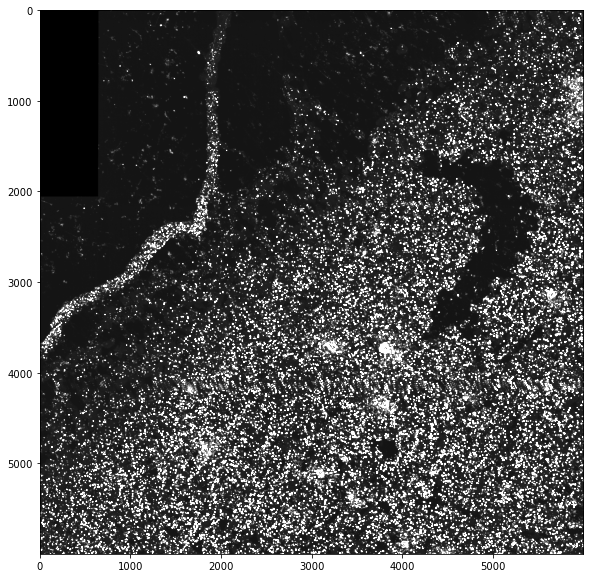

In [41]:
plt.imshow(fake_anchor_max, vmax=vmax, cmap="gray")

In [44]:
fake_anchor_median = np.std(moving_img[1:, 4000:10000, 4000:10000], 0)

In [45]:
fake_anchor_median

dask.array<_sqrt, shape=(6000, 6000), dtype=float64, chunksize=(6000, 6000), chunktype=numpy.ndarray>

In [56]:
viewer.add_image(fake_anchor_median)

<Image layer 'fake_anchor_median [1]' at 0x7f88c499ddf0>

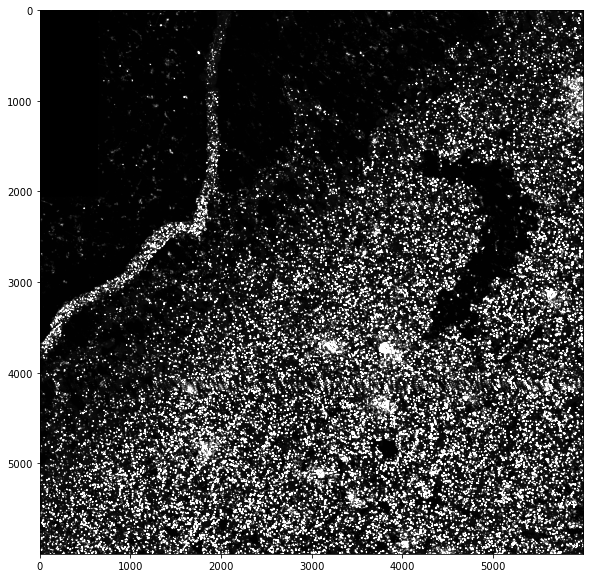

In [48]:
plt.imshow(fake_anchor_median, vmax=500, cmap="gray")

In [57]:
fake_anchor_var = np.var(moving_img[1:, 4000:10000, 4000:10000], 0)

In [58]:
viewer.add_image(fake_anchor_var)

<Image layer 'fake_anchor_var' at 0x7f8921942f10>

In [59]:
import pandas as pd

In [112]:
cyc1_peaks = pd.read_csv(
    "/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/registration/peaks_before_wsireg/HZ_HLB_KR0105_C59-FLEG_Nucleus_b6G_b6A_b6T_b6C_Meas21_A2_F1T1_max.ome_max_peaks.tsv",
    sep="\t", index_col=0)

In [113]:
point_layer = viewer.add_points(cyc1_peaks[['y', 'x']], name=5)

/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [114]:
point_layer.size = 60
point_layer.edge_color = 'r'

In [46]:
import json

In [50]:
with open("/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/registration/wsireg_output/Test/Test-cycle2_to_cycle1_transformations.json", 'r') as fh:
    elastix_tmat = json.load(fh)

In [57]:
elastix_tmat["000-to-cycle1"]

[{'CenterOfRotationPoint': ['2102.04', '1099.575'],
  'CompressResultImage': ['true'],
  'DefaultPixelValue': ['0'],
  'Direction': ['1', '0', '0', '1'],
  'FixedImageDimension': ['2'],
  'FixedInternalImagePixelType': ['float'],
  'HowToCombineTransforms': ['Compose'],
  'Index': ['0', '0'],
  'InitialTransformParametersFileName': ['NoInitialTransform'],
  'MovingImageDimension': ['2'],
  'MovingInternalImagePixelType': ['float'],
  'NumberOfParameters': ['3'],
  'Origin': ['0', '0'],
  'ResampleInterpolator': ['FinalNearestNeighborInterpolator'],
  'Resampler': ['DefaultResampler'],
  'ResultImageFormat': ['mha'],
  'ResultImagePixelType': ['float'],
  'Size': ['46713', '24436'],
  'Spacing': ['0.09', '0.09'],
  'Transform': ['EulerTransform'],
  'TransformParameters': ['-0.001841614241621086',
   '-50.77986177236533',
   '4.730001159268311'],
  'UseDirectionCosines': ['true']},
 {'CenterOfRotationPoint': ['2051.260138227635', '1104.3050011592684'],
  'CompressResultImage': ['true'],

In [68]:
from wsireg.reg_transforms.reg_transform import RegTransform
from wsireg.reg_transforms.reg_transform_seq import RegTransformSeq

In [126]:
reg_trans = RegTransform(elastix_transform=elastix_tmat["000-to-cycle1"][1])

In [127]:
reg_trans.itk_transform

<SimpleITK.SimpleITK.AffineTransform; proxy of <Swig Object of type 'itk::simple::AffineTransform *' at 0x7f8958425090> >

In [128]:
denoised_peaks["z"] = 0

In [137]:
denoised_peaks[["y", "x", "z"]]

,y,x,z
0,4.220496,2020.913519,0
1,6.036959,5574.870659,0
2,7.359385,5612.194296,0
3,6.694300,1998.588195,0
4,8.251460,2759.218533,0
...,...,...,...
29217,5994.746077,4811.487056,0
29218,5994.924682,5088.874145,0
29219,5993.980747,5269.112419,0
29220,5992.887272,5430.874537,0


In [130]:
tmat = reg_trans.as_np_matrix()

In [132]:
translated_molecules = denoised_peaks[["y", "x", "z"]].values.dot(tmat.T)

In [139]:
denoised_peaks["translated_y"] = translated_molecules[:, 0]
denoised_peaks["translated_x"] = translated_molecules[:, 1]

In [140]:
denoised_peaks

,y,x,mass,size,ecc,signal,raw_mass,ep,z,translated_y,translated_x
0,4.220496,2020.913519,204994.156076,2.354186,0.193190,8647.791866,786555.0,0.004794,0,3.179407,2028.679983
1,6.036959,5574.870659,105931.283450,2.457714,0.359577,4140.326876,407949.0,0.009403,0,3.146638,5596.293500
2,7.359385,5612.194296,113622.714315,2.382174,0.295413,4780.904051,452681.0,0.008444,0,4.453918,5633.760938
3,6.694300,1998.588195,68412.921553,2.199166,0.367818,3654.263042,290644.0,0.013392,0,5.672978,2006.269601
4,8.251460,2759.218533,26144.287988,2.019082,0.151179,1600.992462,99859.0,0.043205,0,6.838190,2769.823067
...,...,...,...,...,...,...,...,...,...,...,...
29217,5994.746077,4811.487056,60972.856415,2.192217,0.239871,3139.368730,207955.0,0.019107,0,6011.893241,4831.733103
29218,5994.924682,5088.874145,141043.651891,2.268914,0.144354,6376.040322,508131.0,0.007496,0,6011.927634,5110.186086
29219,5993.980747,5269.112419,61793.624076,2.507440,0.121338,2105.976297,283864.0,0.013729,0,6010.886518,5291.116637
29220,5992.887272,5430.874537,399261.122086,2.364074,0.173438,15853.158897,1361771.0,0.002748,0,6009.705016,5453.499994


In [1]:
import pandas as pd
from glob import glob
import trackpy as tp

In [2]:
tsvs = "/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/registration/peaks_after_registration/*tsv"

In [3]:
dfs = [pd.read_csv(tsv, sep="\t", index_col=0) for tsv in glob(tsvs)]    

In [4]:
full_df = pd.concat(dfs)

In [5]:
tp.linking.Linker.MAX_SUB_NET_SIZE = 200

In [6]:
sub_df = full_df[full_df.frame < 3]

In [29]:
%%timeit
tracked_df = tp.link(full_df, search_range=0)

Frame 6: 351518 trajectories present.
15.8 s ± 222 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%%timeit
tracked_df = tp.link(full_df, search_range=3)

Frame 6: 351518 trajectories present.
16.8 s ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%%timeit
tracked_df = tp.link(full_df, search_range=4)

Frame 6: 351518 trajectories present.
17.8 s ± 217 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
tracked_df = tp.link(full_df, search_range=3)

Frame 6: 351518 trajectories present.


In [33]:
tracked_df

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,A,G,C,T,particle
240909,14637.013953,15701.227907,16008.618375,1.534108,0.065219,1638.091183,52894.0,0.003557,1,11,0,3907,8,0
190992,12901.037855,18255.962145,23603.404767,1.723836,0.368677,2010.384633,93059.0,0.002017,1,5099,10,0,7,1
190993,12899.027536,19439.203623,102752.992363,1.603212,0.130443,9679.629715,335795.0,0.000558,1,0,23877,3,12,2
190994,12899.811905,19842.321429,31272.649850,1.751190,0.102414,2457.136774,112113.0,0.001673,1,6438,8,0,19,3
190995,12900.720000,21496.102222,16753.205277,1.588850,0.148612,1638.091183,62682.0,0.002999,1,4104,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234349,14272.192727,35022.185455,9141.108476,1.778661,0.216226,698.048284,37118.0,0.002682,6,6,1,1980,76,1719188
234350,14271.618834,35996.116592,7412.607964,1.755197,0.301673,698.048284,32614.0,0.003055,6,1972,1,8,33,1719189
234351,14272.367150,36260.758454,6880.761653,1.763834,0.133500,498.605917,28602.0,0.003487,6,1610,12,0,5,1719190
234343,14271.922018,30109.197248,7246.405992,1.768740,0.340476,598.327100,29209.0,0.003414,6,1670,7,41,22,1719191


In [54]:
! pip install xarray xtiff

     |████████████████████████████████| 210 kB 7.5 MB/s eta 0:00:01
  Attempting uninstall: tifffile
    Found existing installation: tifffile 2022.4.8
    Uninstalling tifffile-2022.4.8:
      Successfully uninstalled tifffile-2022.4.8


In [58]:
import napari
import tifffile as tf
import xarray as xr

In [59]:
viewer = napari.Viewer()

In [39]:
tracks = tracked_df[["particle", "frame", "y", "x"]].to_numpy()

In [42]:
viewer.add_tracks(tracks)


KeyboardInterrupt



In [62]:
img = "/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/registration/wsireg_output/0/1-1_to_0_registered.ome.tiff"

In [60]:
spots = pd.read_csv("/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/registration/peaks_after_registration/1-1_to_0_registered.ome_peaks_diam_5_percentile_70_with_profile.tsv",
                    sep="\t", index_col=0)

In [61]:
spots

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,A,G,C,T
0,25.921875,31229.953125,2481.000797,1.211920,0.175682,387.656375,16614.0,0.008047,1,9,1430,4,9
1,49.000000,33922.202532,6124.970717,1.292628,0.239021,775.312749,42962.0,0.003093,1,25,4345,8,6
2,54.680851,31157.872340,1821.984960,1.211646,0.075000,271.359462,11844.0,0.011332,1,10,1132,40,11
3,55.122951,31624.131148,4729.407769,1.231419,0.103561,697.781474,31938.0,0.004167,1,33,3650,3,0
4,56.763359,33507.198473,5078.298506,1.310556,0.270126,620.250199,40538.0,0.003279,1,41,3734,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
807108,24340.703704,9844.888889,2093.344422,1.247219,0.153719,310.125100,14452.0,0.009264,1,40,1306,6,4
807109,24341.737705,13530.262295,2364.703884,1.254500,0.161208,310.125100,16236.0,0.008236,1,17,0,1650,0
807110,24370.825397,14472.158730,2442.235159,1.290994,0.309091,310.125100,17350.0,0.007703,1,32,1691,140,7
807111,24403.160000,14345.980000,1938.281873,1.256981,0.135604,271.359462,14302.0,0.009363,1,7,1340,0,2


In [63]:
img = tf.imread(img)

In [64]:
viewer.add_image(img)

/opt/conda/lib/python3.9/site-packages/napari/_vispy/layers/image.py:231: UserWarning: data shape (24436, 46713) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/napari/_vispy/layers/image.py:231: UserWarning: data shape (24436, 46713) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(


<Image layer 'img' at 0x7f40f5f96040>

In [65]:
viewer.add_points(spots[["y", "x"]])

<Points layer 'Points' at 0x7f40504e3fa0>

In [71]:
import scanpy as sc

In [75]:
spots = pd.read_csv("/nfs/team283_imaging/HZ_HLB/playground_Tong/20220520_hindlimb_63x_final/20220304_63x_label_image_countTable/out_assigned_peaks.csv")

In [76]:
spots

,ID,y,x,ch
0,1,2889.0,5747.0,KRT19
1,1,2874.0,5748.0,infeasible
2,3,3137.0,5819.0,S100A10
3,3,3098.0,5783.0,background
4,3,3103.0,5817.0,background
...,...,...,...,...
716203,79095,24748.0,12749.0,background
716204,79095,24760.0,12843.0,background
716205,79095,24799.0,12830.0,infeasible
716206,79095,24810.0,12831.0,infeasible


In [92]:
import tifffile as tf
import numpy as np

In [97]:
import scanpy as sc

In [98]:
adata = sc.read_h5ad("/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/assign/HZ_HLB.h5ad")

In [99]:
adata

AnnData object with n_obs × n_vars = 11152 × 89
    obs: 'sample', 'total_counts', 'n_genes_by_counts', 'leiden'
    var: 'total_counts', 'n_cells_by_counts'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [101]:
adata.obs

,sample,total_counts,n_genes_by_counts,leiden
25,HZ_HLB,1.0,1,4
35,HZ_HLB,1.0,1,1
40,HZ_HLB,1.0,1,0
41,HZ_HLB,1.0,1,1
49,HZ_HLB,1.0,1,1
...,...,...,...,...
118764,HZ_HLB,1.0,1,0
118765,HZ_HLB,2.0,2,0
118771,HZ_HLB,1.0,1,1
118772,HZ_HLB,2.0,2,5


In [1]:
import scanpy as sc

In [14]:
adata = sc.read_h5ad("/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/20220310_annotated.h5ad")

In [15]:
adata.obs

,sample,total_counts,n_genes_by_counts,doublet_scores,leiden,broad_class,cell_type,cluster
803,,14.0,5,0.016556,5,skin,skin,skin_5
827,,36.0,9,0.015193,5,skin,skin,skin_5
828,,27.0,10,0.019007,5,skin,skin,skin_5
832,,28.0,9,0.015955,5,skin,skin,skin_5
839,,20.0,6,0.012680,5,skin,skin,skin_5
...,...,...,...,...,...,...,...,...
110267,,21.0,7,0.025484,4,progress_zone_mesenchyme,progress_zone_mesenchyme,progress_zone_mesenchyme_4
110268,,45.0,12,0.045294,2,progress_zone_mesenchyme,progress_zone_mesenchyme,progress_zone_mesenchyme_2
110269,,14.0,6,0.120063,2,progress_zone_mesenchyme,progress_zone_mesenchyme,progress_zone_mesenchyme_2
110270,,16.0,7,0.047040,2,progress_zone_mesenchyme,progress_zone_mesenchyme,progress_zone_mesenchyme_2


<AxesSubplot:>

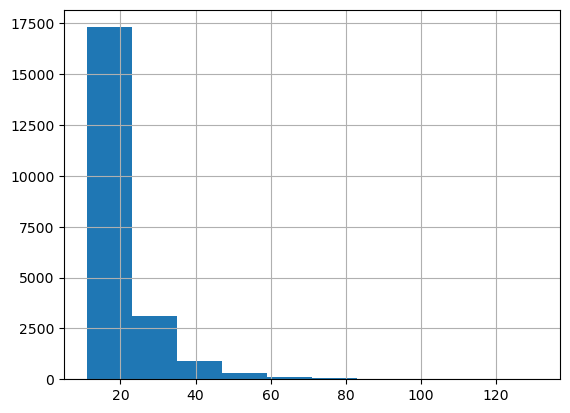

In [16]:
adata.obs.total_counts.hist()

In [62]:
adata1 = sc.read_h5ad("/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/assign/HZ_HLB.h5ad")

In [63]:
adata1.obs

,sample,total_counts,n_genes_by_counts,leiden
25,HZ_HLB,2.0,1,6
29,HZ_HLB,7.0,3,6
30,HZ_HLB,7.0,2,2
31,HZ_HLB,18.0,5,17
32,HZ_HLB,7.0,2,13
...,...,...,...,...
118775,HZ_HLB,3.0,2,21
118776,HZ_HLB,13.0,6,1
118778,HZ_HLB,7.0,3,13
118779,HZ_HLB,1.0,1,9


array([[<AxesSubplot:title={'center':'total_counts'}>,
        <AxesSubplot:title={'center':'n_genes_by_counts'}>]], dtype=object)

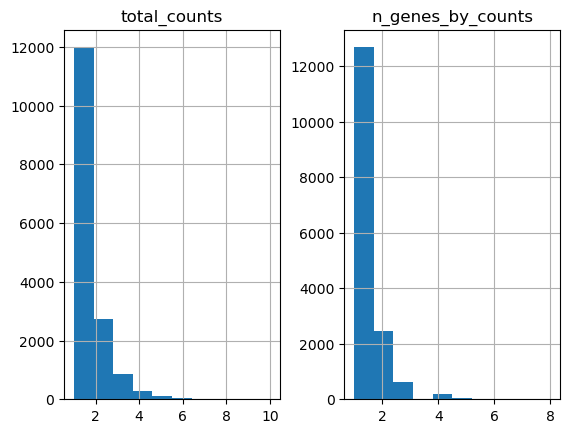

In [25]:
adata1.obs.hist()

In [30]:
peaks = pd.read_csv("/nfs/team283_imaging/HZ_HLB/playground_Tong/20220520_hindlimb_63x_final/HZ_HLB_hindlimb_20220214_63x_decoded/decoded/out_opt_flow_registered_decoded_df.tsv", sep="\t")

In [33]:
peaks[peaks.Probability > 0.6]

,Name,Code,Probability,Unnamed: 0,Unnamed: 0.1,y_int,x_int
1,HMGA1,CCTTCA,0.994393,10,10,1037,12707
2,background,0000,0.640291,22,22,1041,12591
3,HMGA1,CCTTCA,0.882644,26,26,1042,12692
4,HMGA1,CCTTCA,0.858540,35,35,1046,12712
6,background,0000,0.955392,61,61,1059,12741
...,...,...,...,...,...,...,...
1135053,background,0000,0.992954,1221366,1221366,25144,39094
1135054,background,0000,0.992843,1221370,1221370,25153,34203
1135055,background,0000,0.993245,1221390,1221390,25203,34698
1135056,background,0000,0.994308,1221392,1221392,25210,34371


In [34]:
! ls /nfs/team283_imaging/HZ_HLB/playground_Tong/20220520_hindlimb_63x_final/HZ_HLB_hindlimb_20220214_63x_decoded/peak_intensities

out_opt_flow_registered_extracted_peak_intensities.npy
out_opt_flow_registered_peak_locs.csv


In [53]:
r = "/nfs/team283_imaging/HZ_HLB/playground_Tong/20220520_hindlimb_63x_final/HZ_HLB_hindlimb_20220214_63x_decoded/peak_intensities"
# r = "/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/registration/"

In [55]:
npy = np.load(f"{r}/out_opt_flow_registered_extracted_peak_intensities.npy")
# npy = np.load(f"{r}/profiles_for_decoding/anchor_profile_for_decoding.npy")

In [49]:
peaks = pd.read_csv(f"{r}/anchor_peak_profile/anchor_profile_of_frame_1.tsv", sep="\t")

In [57]:
npy

array([[[    0,     0,    10,     0,     0,     0],
        [    0,     0,    11,     0,     0,     0],
        [    0,     0,    23,     0,     0,     0],
        [    0,     0,    13,     0,     0,     0]],

       [[    0,     0,    15,     0,     0,     0],
        [    0,     0, 63884,     0,     0,     0],
        [    0,     0,    98,     0,     0,     0],
        [    0,     0, 65523,     0,     0,     0]],

       [[    0,     0,    11,     0,     0,     0],
        [    0,     0, 65422,     0,     0,     0],
        [    0,     0, 65529,     0,     0,     0],
        [    0,     0,    32,     0,     0,     0]],

       ...,

       [[   12,     0,     0,     7,     8,     5],
        [    4,     0,     0,     5,    11,     6],
        [   13,     0,     0,     7,     6,     6],
        [    8,     0,     0,     9,     9,    10]],

       [[    4,     0,     0,    13,     0,     6],
        [    8,     0,     0,     7,     0,     5],
        [    4,     0,     0,     6,     0,

In [58]:
npy.shape

(1221592, 4, 6)

In [59]:
r = "/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/registration/"
npy = np.load(f"{r}/profiles_for_decoding/anchor_profile_for_decoding.npy")

In [61]:
np.swapaxes(npy, 1, 2)

array([[[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0]],

       ...,

       [[  0, 111, 120,   0, 115, 124],
        [  0, 144, 120,   0, 118, 124],
        [122,   0, 129, 119,   0, 120],
        [118,   0, 122, 115,   0, 122]],

       [[  0, 114, 122,   0, 117, 121],
        [  0, 117, 121,   0, 121, 122],
        [122,   0, 123, 157,   0, 120],
        [118,   0, 115, 116,   0, 123]],

       [[  0, 117, 121,   0, 129, 113],
        [  0, 134, 118,   0, 117, 125],
        [114,   0, 119, 152,   0, 122],
        [121,   0, 117, 116,   0, 125]]])

In [51]:
peaks

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,y_int,x_int,A,G,C,T
0,0,2.474164,4871.969605,45.355884,1.249924,0.466243,8.547309,2087.0,-1.354533,0,2,4871,0,0,0,0
1,1,2.015306,5537.290816,27.020526,0.920293,0.207505,7.995870,4546.0,5.413235,0,2,5537,0,0,0,0
2,2,2.123457,5561.555556,11.166646,0.824022,1.593350,4.962954,7427.0,0.789811,0,2,5561,0,0,0,0
3,3,2.413043,6032.923913,38.049313,1.349987,0.530931,5.514393,1849.0,-1.208319,0,2,6032,0,0,0,0
4,4,2.154667,26348.829333,51.697436,1.330664,0.967362,11.855945,4092.0,69.822972,0,2,26348,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885919,5885919,24432.702564,13632.082051,53.765333,0.902986,0.731135,15.853880,6254.0,1.210894,0,24432,13632,0,0,0,0
5885920,5885920,24432.455185,14107.734622,156.884485,1.322377,0.379611,24.676909,8487.0,0.600961,0,24432,14107,0,0,0,0
5885921,5885921,24431.782418,14238.936264,62.726222,1.220701,0.172132,8.685169,2099.0,-1.362848,0,24431,14238,0,0,0,0
5885922,5885922,24432.611111,14285.444444,14.888861,0.912871,0.690460,5.238673,1932.0,-1.255585,0,24432,14285,0,0,0,0


In [64]:
adata1 = sc.read_h5ad("/nfs/team283_imaging/HZ_HLB/playground_Tong/20221014_KR105_63x/assign/HZ_HLB.h5ad")

<AxesSubplot:>

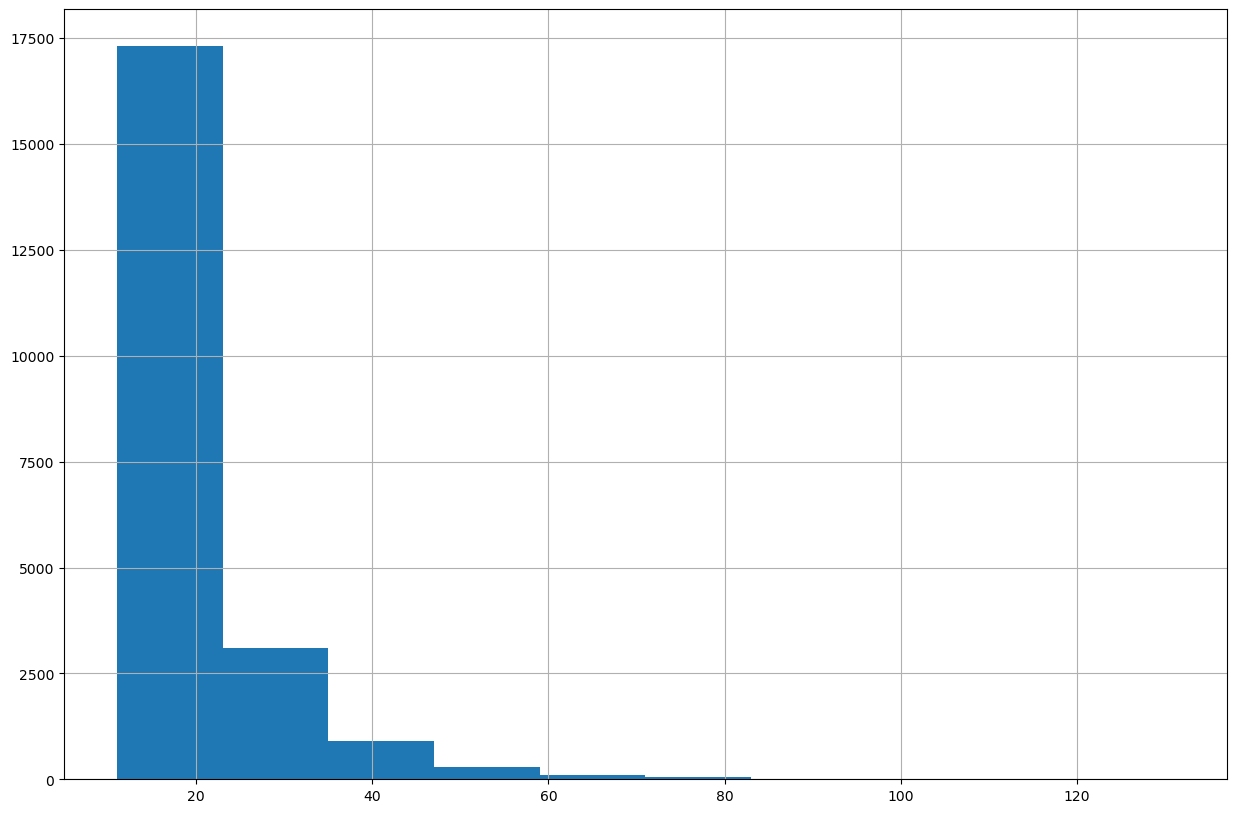

In [65]:
adata.obs.total_counts.hist()

In [1]:
import scanpy as sc

In [2]:
import anndata as ad

In [4]:
adata = ad.read_zarr("https://bayraktar.cog.sanger.ac.uk/ISS/0.0.1/HZ_HLB_KR0105_anndata.zarr")

ClientResponseError: 403, message='Forbidden', url=URL('https://bayraktar.cog.sanger.ac.uk/ISS/0.0.1/HZ_HLB_KR0105_anndata.zarr/obsm')